In [65]:
import numpy as np
import matplotlib.pyplot as plt
import cmath as cm
import math

In [57]:
def dft(x):
    N = len(x)
    X = np.zeros(N, dtype=np.complex128)
    for m in range(N):
        for n in range(N):
            X[m] += x[n] * np.exp(-2j * np.pi * m * n / N)

    return X

In [58]:
def inverse_dft(X):
    N = len(X)
    x = np.zeros(N, dtype=np.complex128)
    for n in range(N):
        for m in range(N):
            x[n] += X[m] * np.exp(2j * np.pi * n * m / N)
        x[n] = x[n] / N

    return x

[ 0.35355339  0.35355339  0.64644661  1.06066017  0.35355339 -1.06066017
 -1.35355339 -0.35355339]
[-5.55111512e-17+0.00000000e+00j  1.66533454e-16-4.00000000e+00j
  1.41421356e+00+1.41421356e+00j -4.44089210e-16-7.21644966e-16j
  5.55111512e-17-1.43476297e-16j  1.60982339e-15+9.43689571e-16j
  1.41421356e+00-1.41421356e+00j -2.38697950e-15+4.00000000e+00j]
[ 0.35355339  0.35355339  0.64644661  1.06066017  0.35355339 -1.06066017
 -1.35355339 -0.35355339]
[0.0, -90.0, 45.0, 0.0, 0.0, 0.0, -45.0, 90.0]


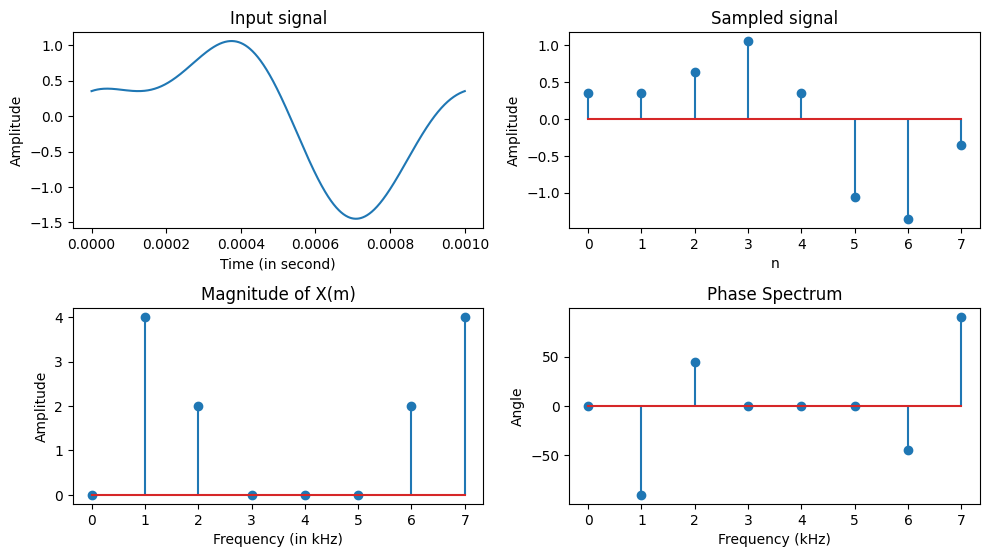

In [72]:
t = np.linspace(0, 0.001, 1000)
x = np.sin(2 * np.pi * 1000 * t) + 0.5 * np.sin(2 * np.pi * 2000 * t + 3 * np.pi / 4)

plt.figure(figsize=(10, 8))

plt.subplot(3, 2, 1)
plt.plot(t, x)
plt.ylabel("Amplitude")
plt.xlabel("Time (in second)")
plt.title("Input signal")

fs = 8000
t = np.arange(0, 1, 1/fs)
x = np.sin(2 * np.pi * 1000 * t) + 0.5 * np.sin(2 * np.pi * 2000 * t + 3 * np.pi / 4)
x_sampled = x[:8]
# print(x_sampled)



plt.subplot(3, 2, 2)
plt.stem(range(len(x_sampled)), x_sampled)
plt.ylabel("Amplitude")
plt.xlabel("n")
plt.title("Sampled signal")
print(x_sampled)

X = dft(x_sampled)
print(X)

plt.subplot(3, 2, 3)
plt.stem(range(len(x_sampled)), np.abs(X))
plt.ylabel("Amplitude")
plt.xlabel("Frequency (in kHz)")
plt.title("Magnitude of X(m)")

xn = inverse_dft(X)
print(xn.real)

# plt.subplot(3, 2, 4)
# plt.plot(range(len(x_sampled)), xn.real)
# plt.ylabel("Amplitude")
# plt.xlabel("n")
# plt.title("Reconstructed signal")

# phase spectrum
X_phase = []
for z in X:
    temp = cm.phase(round(z.real) + round(z.imag) * 1j)
    X_phase.append(math.degrees(temp))
print(X_phase)

plt.subplot(3, 2, 4)
plt.stem(range(len(x_sampled)), X_phase)
plt.ylabel("Angle")
plt.xlabel("Frequency (kHz)")
plt.title("Phase Spectrum")

plt.tight_layout()
plt.show()